<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-07-29 00:07:23.799062


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

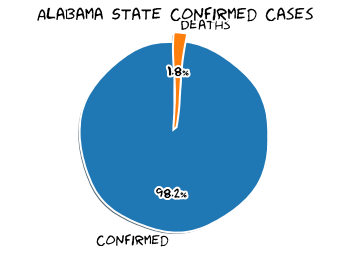

Alabama State Total Population
4887871
Alabama State Confirmed
82366 (1.6851099384578687% of population)
Alabama State Deaths
1491 (1.8102129519461911% of confirmed)



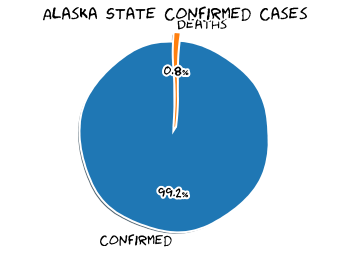

Alaska State Total Population
737438
Alaska State Confirmed
2730 (0.3702006134753023% of population)
Alaska State Deaths
22 (0.805860805860806% of confirmed)



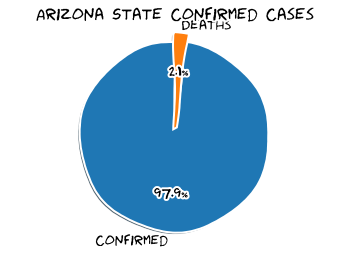

Arizona State Total Population
7171646
Arizona State Confirmed
165934 (2.313750567164079% of population)
Arizona State Deaths
3407 (2.0532259814142972% of confirmed)



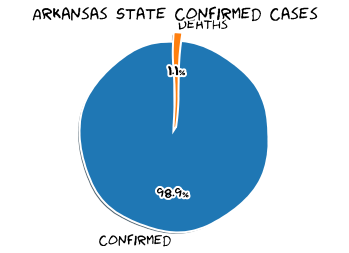

Arkansas State Total Population
3013825
Arkansas State Confirmed
40181 (1.333222731910446% of population)
Arkansas State Deaths
428 (1.0651800602274708% of confirmed)



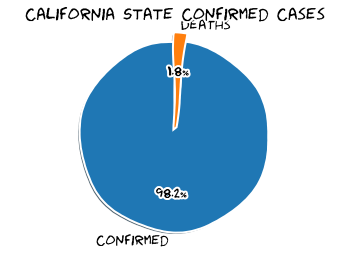

California State Total Population
39557045
California State Confirmed
470739 (1.1900256958021005% of population)
California State Deaths
8677 (1.8432719617452558% of confirmed)



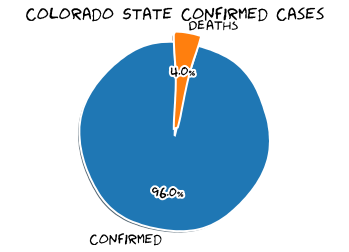

Colorado State Total Population
5695564
Colorado State Confirmed
45296 (0.7952855941922521% of population)
Colorado State Deaths
1807 (3.9893147297774636% of confirmed)



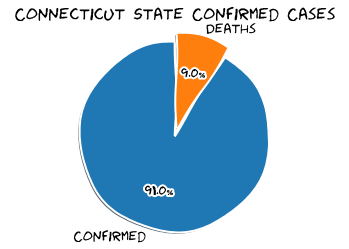

Connecticut State Total Population
3572665
Connecticut State Confirmed
49077 (1.3736804318344988% of population)
Connecticut State Deaths
4423 (9.012368319171914% of confirmed)



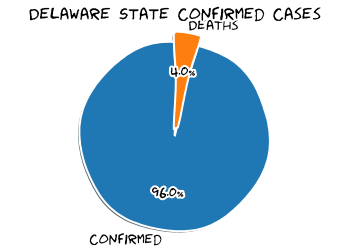

Delaware State Total Population
967171
Delaware State Confirmed
14476 (1.4967363578932784% of population)
Delaware State Deaths
580 (4.006631666206134% of confirmed)



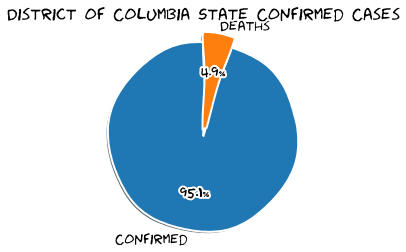

District of Columbia State Total Population
702455
District of Columbia State Confirmed
11945 (1.7004647984568406% of population)
District of Columbia State Deaths
583 (4.880703223105902% of confirmed)



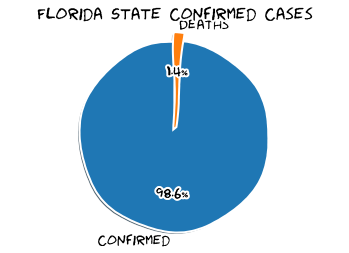

Florida State Total Population
21299325
Florida State Confirmed
441977 (2.0750751490951003% of population)
Florida State Deaths
6117 (1.3840086701344188% of confirmed)



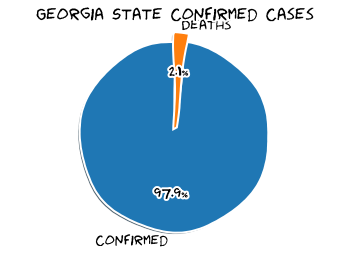

Georgia State Total Population
10519475
Georgia State Confirmed
170843 (1.6240639385520665% of population)
Georgia State Deaths
3509 (2.0539325579625736% of confirmed)



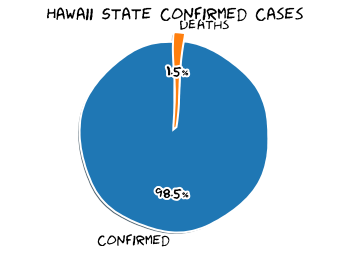

Hawaii State Total Population
1420491
Hawaii State Confirmed
1758 (0.1237600238227486% of population)
Hawaii State Deaths
26 (1.4789533560864618% of confirmed)



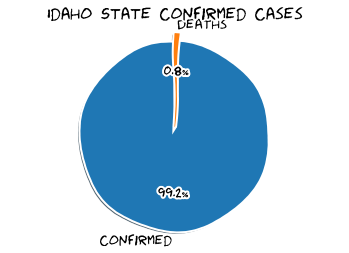

Idaho State Total Population
1754208
Idaho State Confirmed
18692 (1.0655520896039694% of population)
Idaho State Deaths
152 (0.8131821099935802% of confirmed)



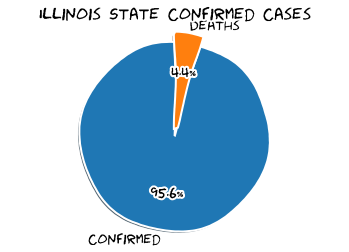

Illinois State Total Population
12741080
Illinois State Confirmed
174968 (1.3732587818301116% of population)
Illinois State Deaths
7638 (4.365369667596361% of confirmed)



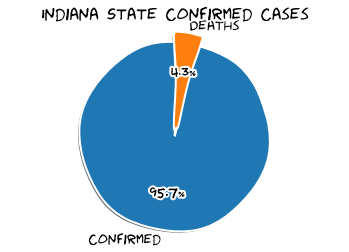

Indiana State Total Population
6691878
Indiana State Confirmed
63678 (0.951571442276742% of population)
Indiana State Deaths
2725 (4.279342944187945% of confirmed)



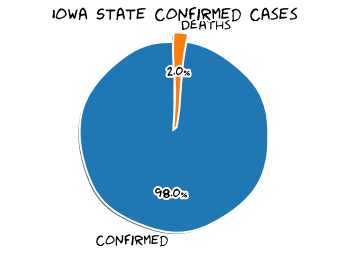

Iowa State Total Population
3156145
Iowa State Confirmed
42787 (1.3556728223830021% of population)
Iowa State Deaths
839 (1.960875966999322% of confirmed)



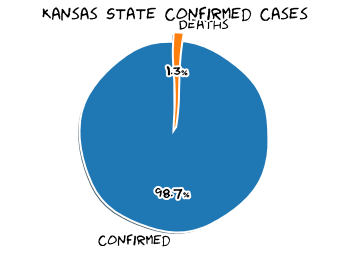

Kansas State Total Population
2911510
Kansas State Confirmed
26044 (0.8945186518335846% of population)
Kansas State Deaths
337 (1.2939640608201506% of confirmed)



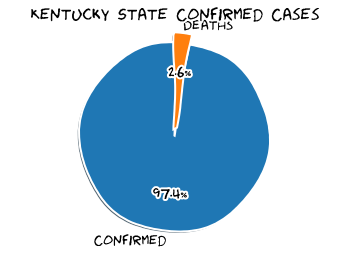

Kentucky State Total Population
4468402
Kentucky State Confirmed
28111 (0.6291063337631664% of population)
Kentucky State Deaths
719 (2.557717619437231% of confirmed)



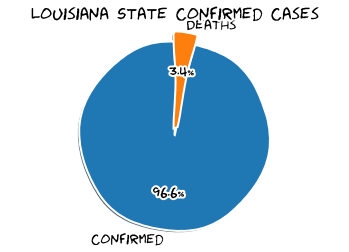

Louisiana State Total Population
4659978
Louisiana State Confirmed
111038 (2.3828009488456816% of population)
Louisiana State Deaths
3812 (3.4330589527909363% of confirmed)



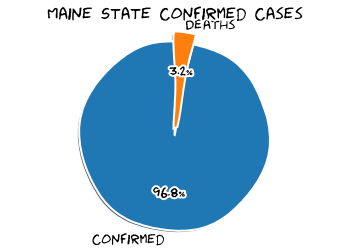

Maine State Total Population
1338404
Maine State Confirmed
3838 (0.2867594537972092% of population)
Maine State Deaths
121 (3.1526836894215737% of confirmed)



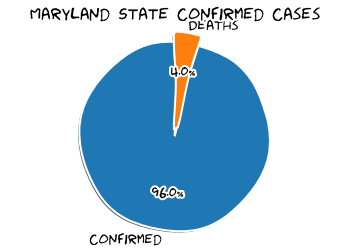

Maryland State Total Population
6042718
Maryland State Confirmed
85524 (1.4153233693844394% of population)
Maryland State Deaths
3443 (4.025770543940882% of confirmed)



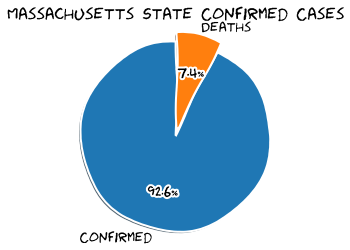

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
116182 (1.683272847340734% of population)
Massachusetts State Deaths
8551 (7.360004131448934% of confirmed)



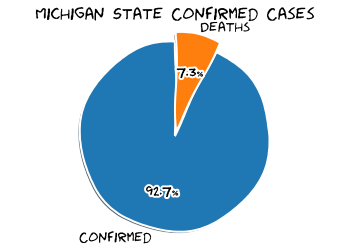

Michigan State Total Population
9995915
Michigan State Confirmed
87958 (0.8799394552674767% of population)
Michigan State Deaths
6421 (7.300075035812546% of confirmed)



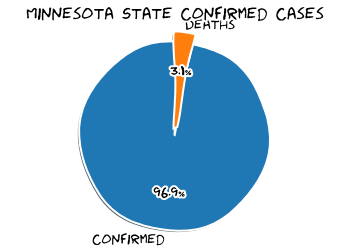

Minnesota State Total Population
5611179
Minnesota State Confirmed
52281 (0.9317293210571254% of population)
Minnesota State Deaths
1620 (3.0986400413152007% of confirmed)



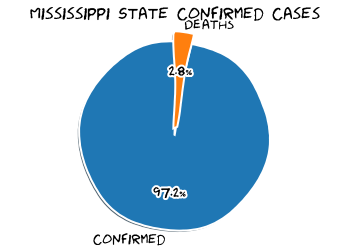

Mississippi State Total Population
2986530
Mississippi State Confirmed
54085 (1.8109645642267111% of population)
Mississippi State Deaths
1540 (2.8473698807432744% of confirmed)



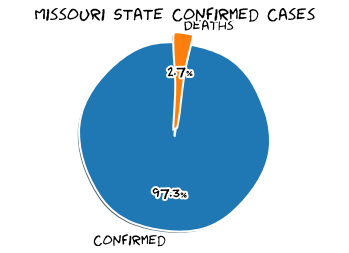

Missouri State Total Population
6126452
Missouri State Confirmed
45181 (0.7374741530660813% of population)
Missouri State Deaths
1232 (2.7268099422323546% of confirmed)



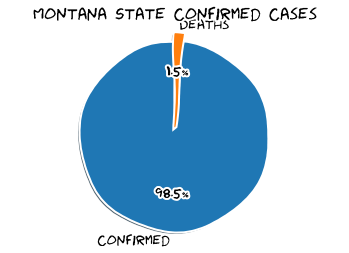

Montana State Total Population
1062305
Montana State Confirmed
3474 (0.3270247245376799% of population)
Montana State Deaths
51 (1.468048359240069% of confirmed)



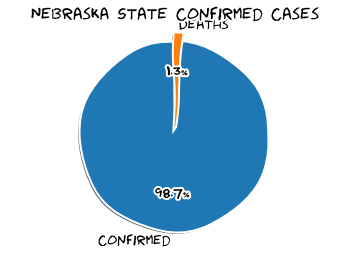

Nebraska State Total Population
1929268
Nebraska State Confirmed
25140 (1.3030849005944223% of population)
Nebraska State Deaths
322 (1.2808273667462213% of confirmed)



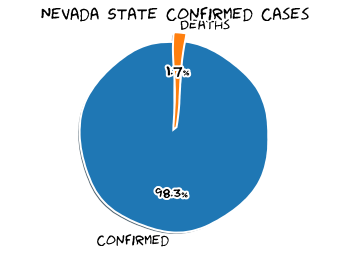

Nevada State Total Population
3034392
Nevada State Confirmed
44936 (1.4808897466115123% of population)
Nevada State Deaths
759 (1.68906889798825% of confirmed)



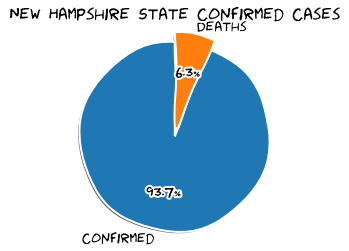

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
6441 (0.47483961906671635% of population)
New Hampshire State Deaths
409 (6.349945660611707% of confirmed)



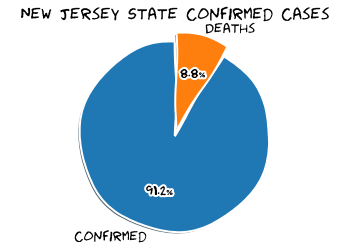

New Jersey State Total Population
8908520
New Jersey State Confirmed
180295 (2.0238490793083477% of population)
New Jersey State Deaths
15825 (8.777281677251171% of confirmed)



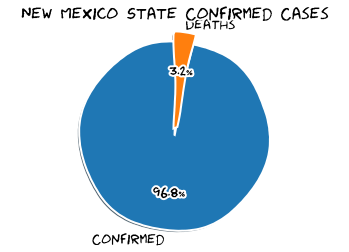

New Mexico State Total Population
2095428
New Mexico State Confirmed
19780 (0.9439598974529309% of population)
New Mexico State Deaths
625 (3.159757330637007% of confirmed)



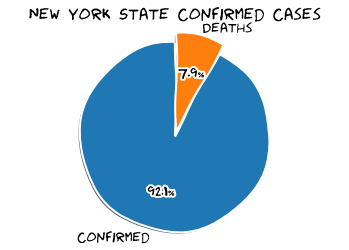

New York State Total Population
19542209
New York State Confirmed
412878 (2.1127498943440837% of population)
New York State Deaths
32653 (7.908631605462146% of confirmed)



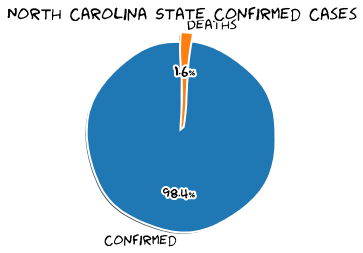

North Carolina State Total Population
10383620
North Carolina State Confirmed
116700 (1.123885504284633% of population)
North Carolina State Deaths
1860 (1.5938303341902313% of confirmed)



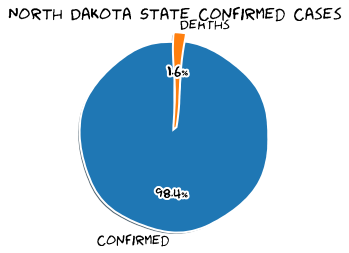

North Dakota State Total Population
760077
North Dakota State Confirmed
6141 (0.8079444582588344% of population)
North Dakota State Deaths
100 (1.6283992835043153% of confirmed)



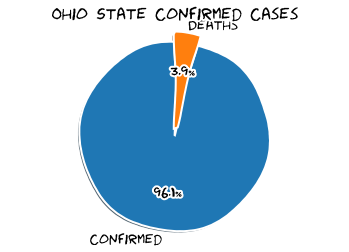

Ohio State Total Population
11689442
Ohio State Confirmed
86497 (0.7399583316295166% of population)
Ohio State Deaths
3382 (3.9099621952206434% of confirmed)



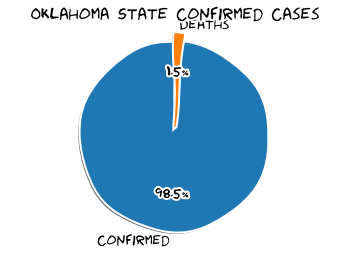

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
33775 (0.8565641215912743% of population)
Oklahoma State Deaths
509 (1.5070318282753516% of confirmed)



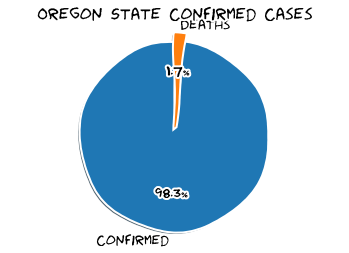

Oregon State Total Population
4190713
Oregon State Confirmed
17408 (0.4153947072968251% of population)
Oregon State Deaths
303 (1.7405790441176472% of confirmed)



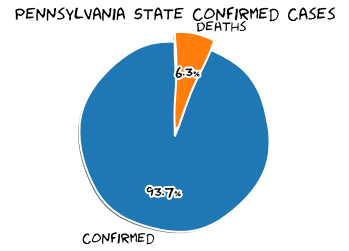

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
114083 (0.8907821154894253% of population)
Pennsylvania State Deaths
7154 (6.2708729609144225% of confirmed)



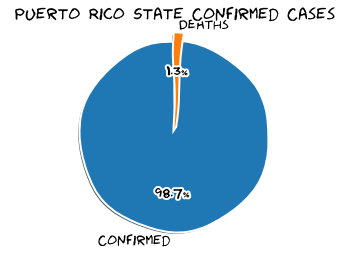

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
15840 (0.4957509077030114% of population)
Puerto Rico State Deaths
209 (1.3194444444444444% of confirmed)



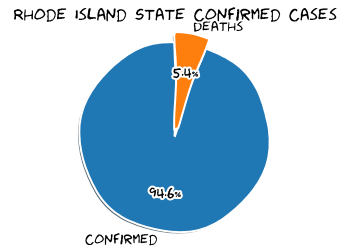

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
18725 (1.7709953987222349% of population)
Rhode Island State Deaths
1005 (5.367156208277703% of confirmed)



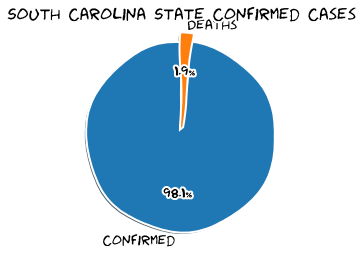

South Carolina State Total Population
5084127
South Carolina State Confirmed
84109 (1.6543449839077584% of population)
South Carolina State Deaths
1565 (1.8606807832693293% of confirmed)



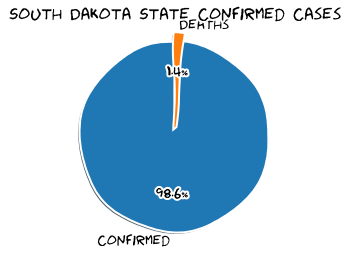

South Dakota State Total Population
882235
South Dakota State Confirmed
8492 (0.9625553282288732% of population)
South Dakota State Deaths
122 (1.436646255299105% of confirmed)



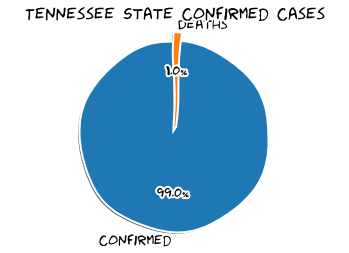

Tennessee State Total Population
6770010
Tennessee State Confirmed
96489 (1.4252416170729438% of population)
Tennessee State Deaths
978 (1.0135870410098562% of confirmed)



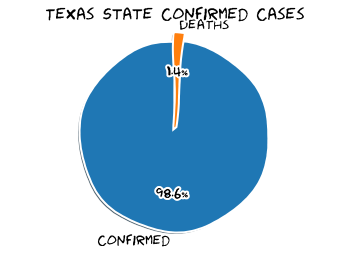

Texas State Total Population
28701845
Texas State Confirmed
407427 (1.419515017240181% of population)
Texas State Deaths
5822 (1.4289676432833365% of confirmed)



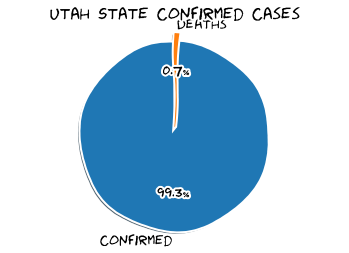

Utah State Total Population
3161105
Utah State Confirmed
38855 (1.2291587909923902% of population)
Utah State Deaths
286 (0.736070003860507% of confirmed)



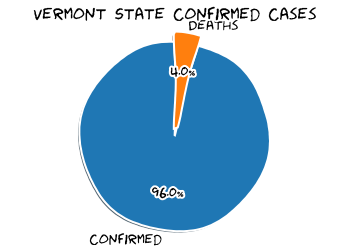

Vermont State Total Population
626299
Vermont State Confirmed
1405 (0.22433374474492215% of population)
Vermont State Deaths
56 (3.98576512455516% of confirmed)



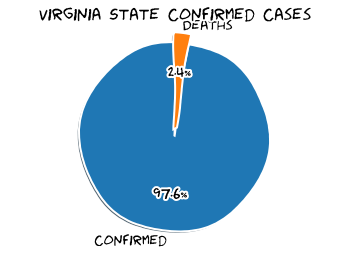

Virginia State Total Population
8517685
Virginia State Confirmed
86994 (1.0213338483402472% of population)
Virginia State Deaths
2095 (2.4082120606018806% of confirmed)



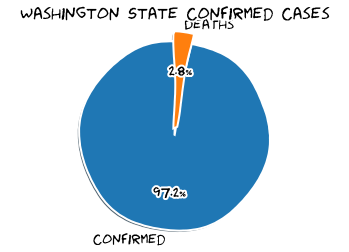

Washington State Total Population
7535591
Washington State Confirmed
53321 (0.7075888274721917% of population)
Washington State Deaths
1518 (2.846908347555372% of confirmed)



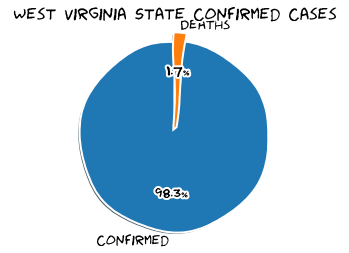

West Virginia State Total Population
1805832
West Virginia State Confirmed
6127 (0.33928959061529534% of population)
West Virginia State Deaths
106 (1.7300473314835974% of confirmed)



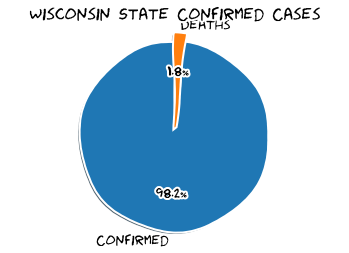

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
50179 (0.8631360293712914% of population)
Wisconsin State Deaths
906 (1.8055361804739034% of confirmed)



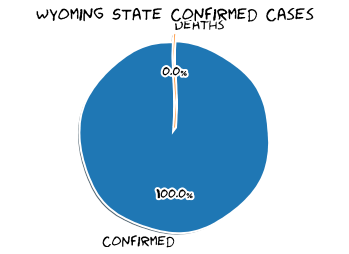

Wyoming State Total Population
577737
Wyoming State Confirmed
2590 (0.44830087046528094% of population)
Wyoming State Deaths
1 (0.03861003861003861% of confirmed)



In [10]:
for i in states:
    state_details(i)

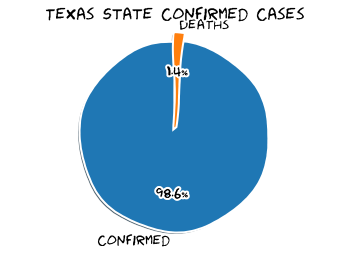

Texas State Total Population
28701845
Texas State Confirmed
407427 (1.419515017240181% of population)
Texas State Deaths
5822 (1.4289676432833365% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
4346706
US Deaths
148858

New York City Confirmed
224249
New York City Deaths
23507

Philippines Confirmed
83673
Philippines Deaths
1947



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 16660138},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 658813},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-07-28T23:35:07.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 9699116},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [404]>


""


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1595979307000,40.767273,-73.971526,224249,0,23507,200742,New York City,36061,"New York City, New York, US",2689.863529,None,None,84036061,USA
1,California,US,1595979307000,34.308284,-118.228241,178642,0,4426,174216,Los Angeles,06037,"Los Angeles, California, US",1779.461062,None,None,84006037,USA
2,Arizona,US,1595979307000,33.348359,-112.491815,111446,0,1882,109564,Maricopa,04013,"Maricopa, Arizona, US",2484.631296,None,None,84004013,USA
3,Florida,US,1595979307000,25.611236,-80.551706,110352,0,1425,108927,Miami-Dade,12086,"Miami-Dade, Florida, US",4061.628155,None,None,84012086,USA
4,Illinois,US,1595979307000,41.841448,-87.816588,103441,0,4857,98584,Cook,17031,"Cook, Illinois, US",2008.472238,None,None,84017031,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,Maine,US,1595979307000,NaN,NaN,1,0,0,1,Unassigned,90023,"Unassigned, Maine, US",NaN,None,None,84090023,USA
3200,Nebraska,US,1595979307000,41.914827,-98.527989,1,0,0,1,Wheeler,31183,"Wheeler, Nebraska, US",127.713921,None,None,84031183,USA
3201,Montana,US,1595979307000,46.959252,-104.251093,1,0,0,1,Wibaux,30109,"Wibaux, Montana, US",103.199174,None,None,84030109,USA
3202,Alaska,US,1595010912000,59.796037,-158.238194,1,0,0,1,Dillingham,02070,"Dillingham, Alaska, US",20.341741,None,None,84002070,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1595979307000,40.767273,-73.971526,224249,0,23507,200742,New York City,36061,"New York City, New York, US",2689.863529,None,None,84036061,USA
8,New York,US,1595979307000,40.740665,-73.589419,43059,0,2194,40865,Nassau,36059,"Nassau, New York, US",3173.280154,None,None,84036059,USA
9,New York,US,1595979307000,40.883201,-72.801217,43024,0,1996,41028,Suffolk,36103,"Suffolk, New York, US",2913.718736,None,None,84036103,USA
12,New York,US,1595979307000,41.162784,-73.757417,35838,0,1443,34395,Westchester,36119,"Westchester, New York, US",3704.163075,None,None,84036119,USA
57,New York,US,1595979307000,41.150279,-74.025605,13845,0,673,13172,Rockland,36087,"Rockland, New York, US",4249.683077,None,None,84036087,USA
71,New York,US,1595979307000,41.403375,-74.302408,11024,0,489,10535,Orange,36071,"Orange, New York, US",2863.822933,None,None,84036071,USA
105,New York,US,1595979307000,42.762490,-78.730637,8364,0,663,7701,Erie,36029,"Erie, New York, US",910.414911,None,None,84036029,USA
180,New York,US,1595979307000,43.146389,-77.693229,4632,0,277,4355,Monroe,36055,"Monroe, New York, US",624.452323,None,None,84036055,USA
185,New York,US,1595979307000,41.764861,-73.743567,4447,0,153,4294,Dutchess,36027,"Dutchess, New York, US",1511.464288,None,None,84036027,USA
231,New York,US,1595979307000,43.004919,-76.199712,3419,0,194,3225,Onondaga,36067,"Onondaga, New York, US",742.408713,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

412878

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1595979307000,40.767273,-73.971526,224249,0,23507,200742,New York City,36061,"New York City, New York, US",2689.863529,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
40,None,Philippines,1595979307000,12.879721,121.774017,83673,26617,1947,55109,None,None,Philippines,76.357156,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
